## KNN(최근접이웃)

### 1. 개요

![](https://miro.medium.com/max/506/0*QyWp7J6eSz0tayc0.png)

&nbsp;&nbsp;&nbsp; ***<출처 : https://miro.medium.com/max/506/0*QyWp7J6eSz0tayc0.png>***


&nbsp;&nbsp;&nbsp; KNN 알고리즘은 주변 데이터를 기반으로 알고 싶은 특정 데이터를 분류 혹은 예측하는 직관적이고 간단한 모델입니다. 이름의 K는 주변 이웃 데이터의 수로, 분류를 수행할 경우 '?'라는 데이터를 주변 K개의 데이터 중 가장 수가 많은 데이터에 따라 분류하고 회귀는 K는 K개의 데이터들의 평균값으로 예측하는 것이 기본적인 방법입니다. K는 하이퍼 파라미터를 통해 정합니다.

***파리미터와 하이퍼파라미터***

&nbsp;&nbsp;&nbsp; *-파라미터 : 머신러닝 모델이 학습 과정에서 추정하는 내부 변수로, 자동으로 결정된다.*

&nbsp;&nbsp;&nbsp; *-하이퍼 파라미터 : 데이터 과학자가 모델 훈련시 직접 설정하는 외부 고정 변수*


### 2. 거리 및 표준화

&nbsp;&nbsp;&nbsp; **1)유클리드 거리 :** 위에서 거리 기준으로 K개의 데이터를 선정한다고 했는데요. 그렇다면 그 거리는 어떻게 구하는걸까요. 바로 유클리드 거리(Euclidean Distance)를 사용합니다. 

&nbsp;&nbsp;&nbsp;두 점 \((x_1, y_1)\)과 \((x_2, y_2)\) 사이의 유클리드 거리는 다음 공식으로 계산됩니다:

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

&nbsp;&nbsp;&nbsp;일반적으로 n차원 공간에서 두 점 \(\mathbf{p} = (p_1, p_2, \ldots, p_n)\)과 \(\mathbf{q} = (q_1, q_2, \ldots, q_n)\) 사이의 유클리드 거리는 다음과 같이 확장됩니다:

$$
d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}
$$



&nbsp;&nbsp;&nbsp; **2)표준화 필수 :** 데이터 간 거리에 기반하는 모델이기 때문에 각 특성(feature)의 단위에 영향을 크게 받습니다. 때문에 스케일링이나 애초에 단위를 통일하는 등의 방식으로 반드시 데이터 표준화를 수행해줘야합니다.


### 3. 분류시의 문제점 보완

&nbsp;&nbsp;&nbsp; 이웃 데이터들의 평균 값을 사용하는 회귀의 경우 별다른 문제가 없지만, 분류의 경우 주변 데이터들에 기반한 다수결이 항상 가능한 것은 아닙니다. 그럴 경우 다음의 방법들을 고려할 수 있습니다.

&nbsp;&nbsp;&nbsp;-전체 데이터에서 가장 많이 관측되는 데이터로 분류

&nbsp;&nbsp;&nbsp;-K값을 홀수로 정하기

&nbsp;&nbsp;&nbsp;-K를 1로 설정하고 다시 분류하기 -> 가장 가까운 데이터를 따라 분류

&nbsp;&nbsp;&nbsp;-랜덤으로 분류


### 4. 장단점

&nbsp;&nbsp;&nbsp; **1)장점**

&nbsp;&nbsp;&nbsp; -직관성 : 모델이 이해하기 쉽고 직관적입니다.

&nbsp;&nbsp;&nbsp; -비모수 : 모집단의 가정이나 형태를 고려하지 않아도 됩니다.

&nbsp;&nbsp;&nbsp; -효과적 : 회귀, 분류 모두 가능하며 고차원 데이터에서 효과적일 수 있습니다.

&nbsp;&nbsp;&nbsp; **2)단점**

&nbsp;&nbsp;&nbsp; -계산 비용 : 거리 계산 비용이 클 수 있습니다(특히 차원이 높을 경우 => 차원의 저주)

&nbsp;&nbsp;&nbsp; -데이터 품질 : 데이터 품질에 민감해서, 노이즈가 많은 경우 선응이 저하될 수 있습니다.



### 5. KNN 추가 : 알고리즘 개선 방법

&nbsp;&nbsp;&nbsp; -교차 검증 활용 : 교차 검증을 통한 최적 K값 선택

&nbsp;&nbsp;&nbsp; -차원 감소 : 고차원 데이터의 차원 감소 통한 계산 비용 감소

&nbsp;&nbsp;&nbsp; -위치 가중 KNN : 가까운 이웃에게 더 높은 가중치 부여


### 6. 자료 출처

&nbsp;&nbsp;&nbsp; https://nobsai.tistory.com/11

&nbsp;&nbsp;&nbsp; https://blog.naver.com/rfs2006/223434856755


### 6. 캐글 데이터 실습

&nbsp;&nbsp;&nbsp; -출처 : https://www.kaggle.com/code/mbalvi75/08-knn-diabetes-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df = pd.read_csv('C:/Users/neddy/Documents/GitHub/머신러닝학습/diabetes.csv')


In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

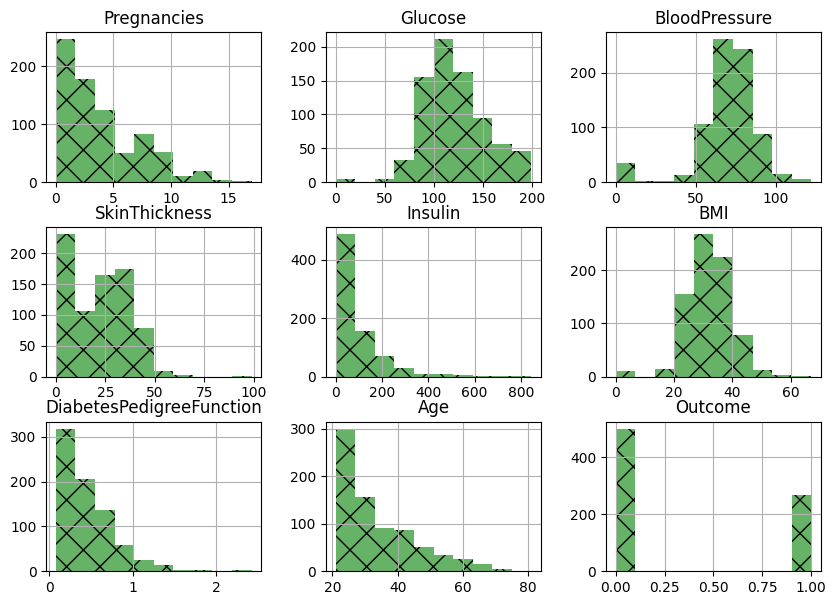

In [13]:
w = 5
df.hist(bins=10, figsize=(10,7), color='green', alpha=0.6, hatch='X', rwidth=w);
#hatch : 막대 채우기 패턴
#rwidth : 각 데이터 간격에 대한 막대의 상대적인 넓이(5 =>각 데이터 간격의 5배)

In [10]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=4)

In [11]:
sc = StandardScaler()

xtr = sc.fit_transform(xtr)
xte = sc.fit_transform(xte)

In [12]:
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

clf.fit(xtr, ytr)

pred = clf.predict(xte)

print(confusion_matrix(pred, yte))
print(accuracy_score(pred, yte))

[[88 25]
 [14 27]]
0.7467532467532467
